## UCLA model trained on the combined ITU + UCLA dataset without visual attributes cutting point at .43 (removing images) evaluation

In [3]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

### Load the data

In [4]:
pred_dir = "models_preds"
file_name = "UCLA_model_without_visual_in_combined_dataset_cutpoint_removing__datalen-44321_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  8862  rows


In [5]:
preds

,imageHASH,name,violence,protest,luca rossi,pred_protest,pred_violence
0,db1b1a185ada3332,train-05823.jpg,-1.000000,False,False,0.001043,0.331108
1,e3242466e6b65ac9,train-30569.jpg,-1.000000,False,False,0.197068,0.324678
2,4d0bb88686838b03,train-15636.jpg,-1.000000,False,False,0.015148,0.209399
3,4e2e3331b9f98989,train-14551.jpg,-1.000000,False,False,0.285573,0.281557
4,896676376c5353e1,train-30374.jpg,-1.000000,False,False,0.001651,0.266828
5,a6a8b2b2a6e6d484,train-23576.jpg,-1.000000,False,False,0.008184,0.288920
6,4c48d98d2c715466,train-29075.jpg,0.386274,True,False,0.974809,0.369582
7,7478959699b33f5d,train-00637.jpg,-1.000000,False,False,0.040859,0.305750
8,8e3232326c252430,train-23053.jpg,-1.000000,False,False,0.000030,0.322958
9,9f1e6666233333b3,9f1e6666233333b3.jpeg,-1.000000,False,True,0.259673,0.608915


### Protest

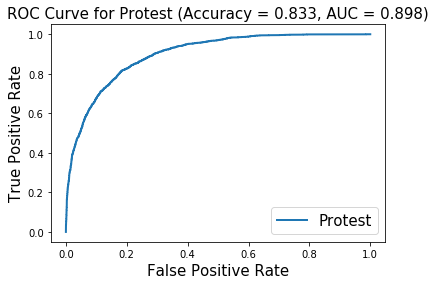

In [6]:
au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.725, R_squared = 0.526 )')

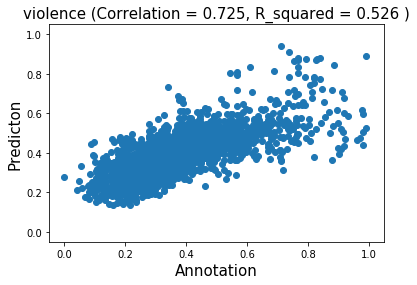

In [7]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
